# Deep Convolutional VAE with face emotion data

In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
from util import gpusession,plot_grid_imgs
from model import basic_dcvae, lrelu
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages Loaded")

Packages Loaded


Load Data

In [2]:
loadpath = '../data/face_emotion.npz'
l = np.load(loadpath)
trainimg,trainlabel = l['trainimg'],l['trainlabel']
testimg,testlabel = l['testimg'],l['testlabel']
valimg,vallabel = l['valimg'],l['vallabel']
ntrain,ntest,nval = trainimg.shape[0],testimg.shape[0],valimg.shape[0]
X,Y,imgcnt,labels,xshp=l['X'],l['Y'],l['imgcnt'],l['labels'],l['rszshape']
xdim,nclass = X.shape[1],Y.shape[1]
print ("[%d] images with xshape:[%s] and nclass:[%d]"%(X.shape[0],xshp,nclass))
print ("#Train:[%d] #Test[%d] #Validation[%d]"%(ntrain,ntest,nval))

[35886] images with xshape:[[64 64]] and nclass:[7]
#Train:[25120] #Test[7177] #Validation[3589]


Instantiate DCVAE

In [3]:
V = basic_dcvae(_name='DCVAE',_xdim=xshp,_zdim=128,
                _filtersize=[5,5],_nfilter=128,_actv=lrelu,
                _lr=0.0005,_beta1=0.9,_beta2=0.99,_epsilon=1e-2)

[DCVAE] Instantiated
 xdim:[[64 64  1]] zdim:[128] nfilter:[128] filtersize:[[5, 5]]
Trainable Variables
 [0] Name:[encoder/conv0/weights:0] Shape:[[5, 5, 1, 128]]
 [1] Name:[encoder/conv0/biases:0] Shape:[[128]]
 [2] Name:[encoder/conv1/weights:0] Shape:[[5, 5, 128, 256]]
 [3] Name:[encoder/conv1/BatchNorm/beta:0] Shape:[[256]]
 [4] Name:[encoder/conv2/weights:0] Shape:[[5, 5, 256, 512]]
 [5] Name:[encoder/conv2/BatchNorm/beta:0] Shape:[[512]]
 [6] Name:[encoder/conv3/weights:0] Shape:[[5, 5, 512, 1024]]
 [7] Name:[encoder/conv3/BatchNorm/beta:0] Shape:[[1024]]
 [8] Name:[encoder/zmu/weights:0] Shape:[[16384, 128]]
 [9] Name:[encoder/zmu/biases:0] Shape:[[128]]
 [10] Name:[encoder/zlogvar/weights:0] Shape:[[16384, 128]]
 [11] Name:[encoder/zlogvar/biases:0] Shape:[[128]]
 [12] Name:[decoder/lin0/weights:0] Shape:[[128, 16384]]
 [13] Name:[decoder/lin0/biases:0] Shape:[[16384]]
 [14] Name:[decoder/lin0_bn/beta:0] Shape:[[1024]]
 [15] Name:[decoder/up1/weights:0] Shape:[[5, 5, 512, 1024

Optimize DCVAE

[0e+00/1e+04 0.0%][kl_weight:1.00] [LOSS] TOTAL[2411.1]=RECON[1856.2]+KL[555.0]


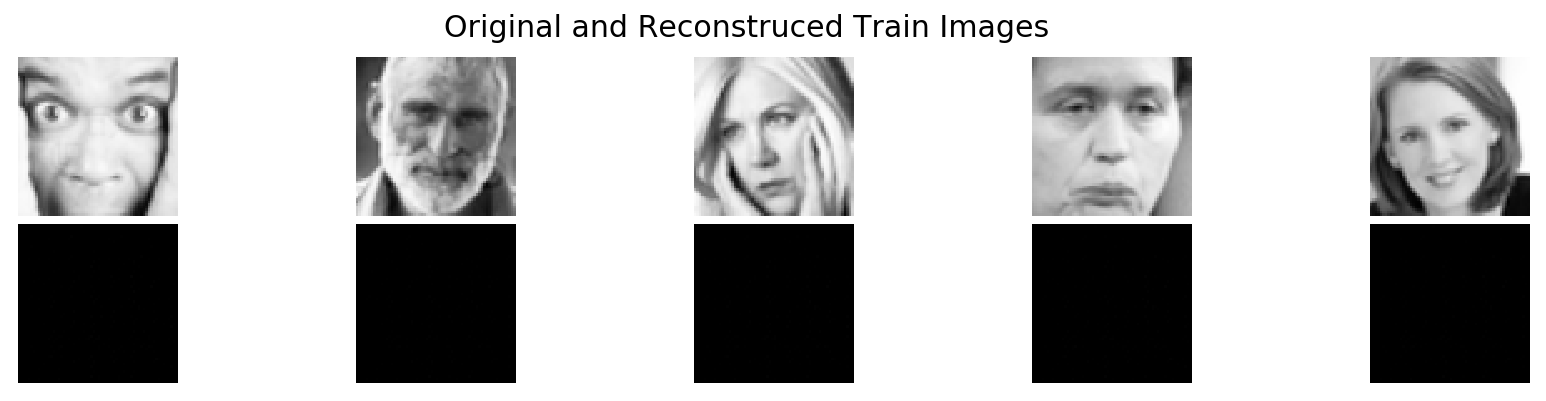

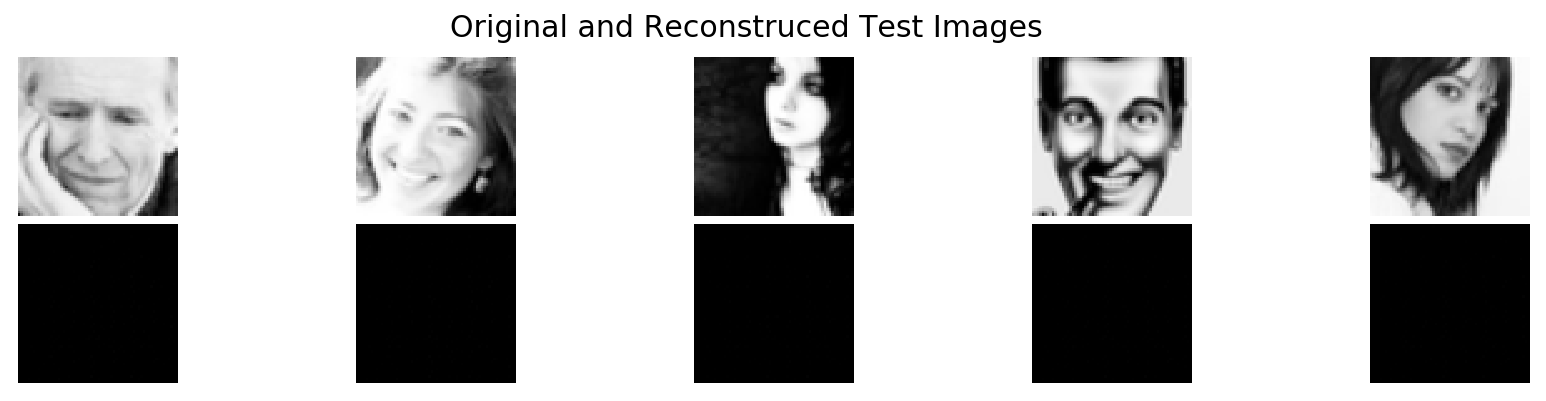

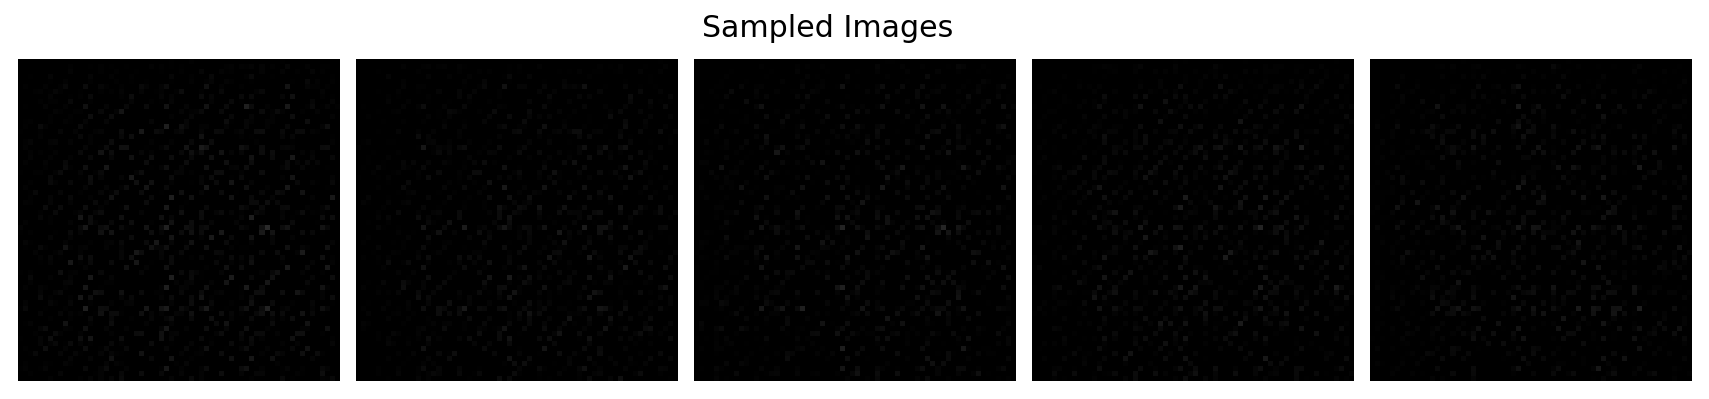

[2e+02/1e+04 2.0%][kl_weight:1.00] [LOSS] TOTAL[926.7]=RECON[917.3]+KL[9.3]
[4e+02/1e+04 4.0%][kl_weight:1.00] [LOSS] TOTAL[707.5]=RECON[692.1]+KL[15.4]
[6e+02/1e+04 6.0%][kl_weight:1.00] [LOSS] TOTAL[563.3]=RECON[503.8]+KL[59.4]
[8e+02/1e+04 8.0%][kl_weight:1.00] [LOSS] TOTAL[405.1]=RECON[370.4]+KL[34.7]
[1e+03/1e+04 10.0%][kl_weight:1.00] [LOSS] TOTAL[490.8]=RECON[330.6]+KL[160.1]


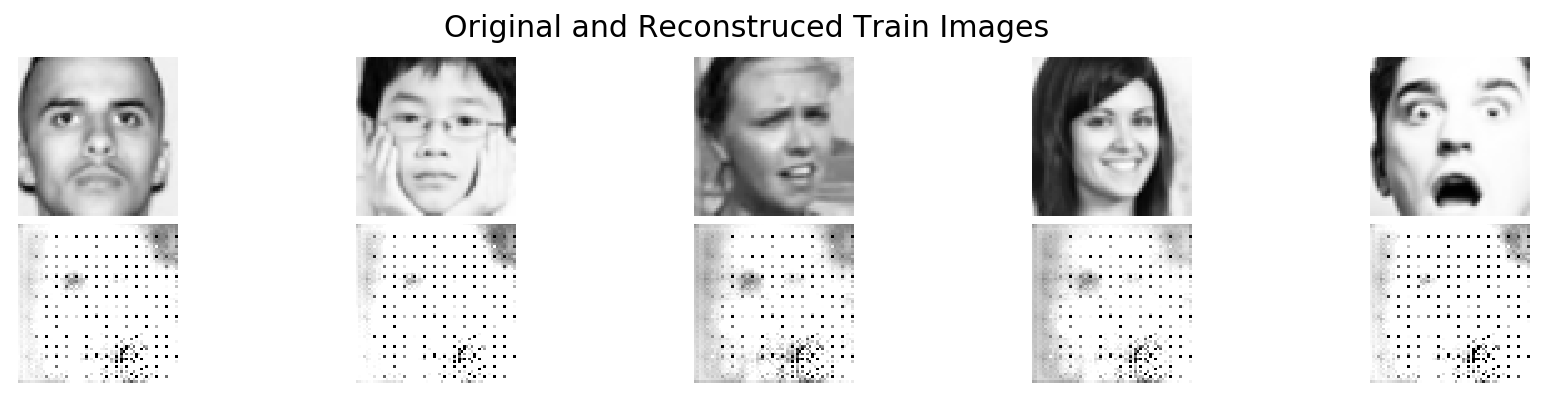

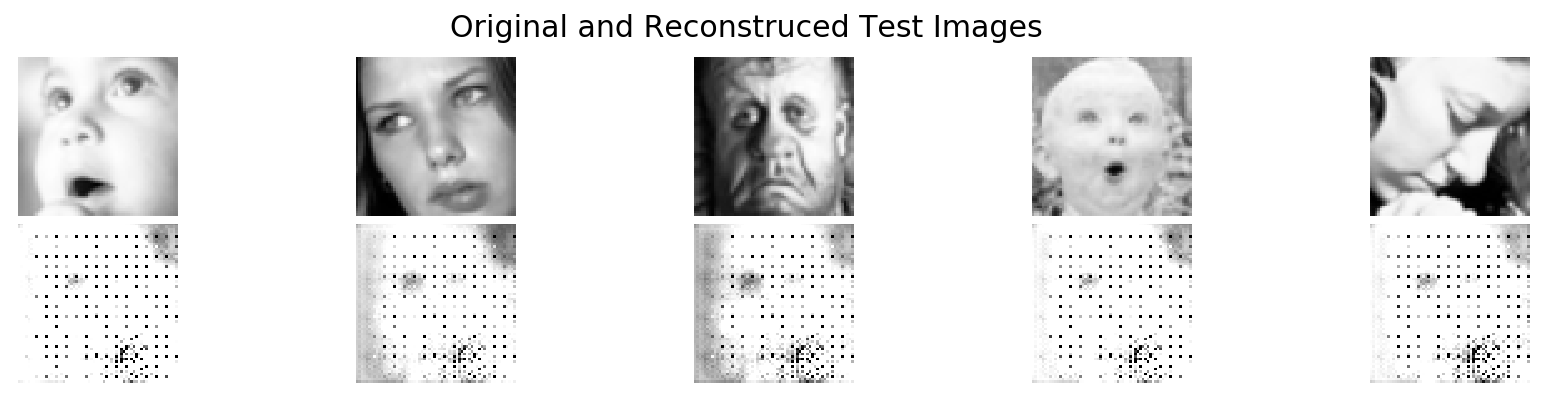

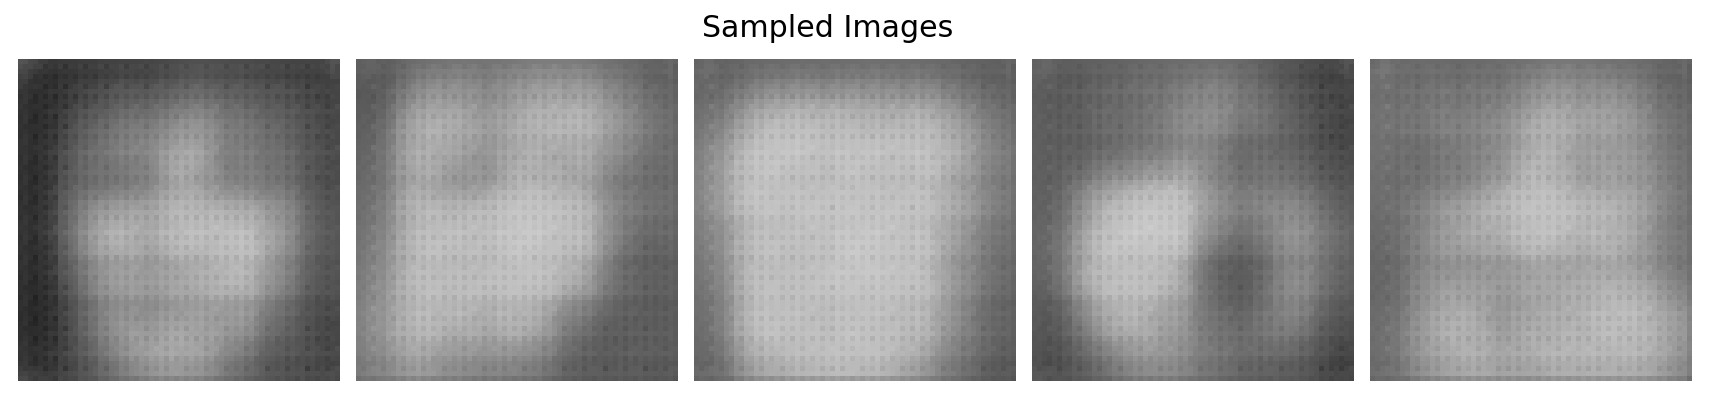

[1e+03/1e+04 12.0%][kl_weight:1.00] [LOSS] TOTAL[285.6]=RECON[243.1]+KL[42.5]
[1e+03/1e+04 14.0%][kl_weight:1.00] [LOSS] TOTAL[759.0]=RECON[293.1]+KL[465.8]
[2e+03/1e+04 16.0%][kl_weight:1.00] [LOSS] TOTAL[286.3]=RECON[231.1]+KL[55.1]
[2e+03/1e+04 18.0%][kl_weight:1.00] [LOSS] TOTAL[291.5]=RECON[242.9]+KL[48.6]
[2e+03/1e+04 20.0%][kl_weight:1.00] [LOSS] TOTAL[279.8]=RECON[235.2]+KL[44.6]


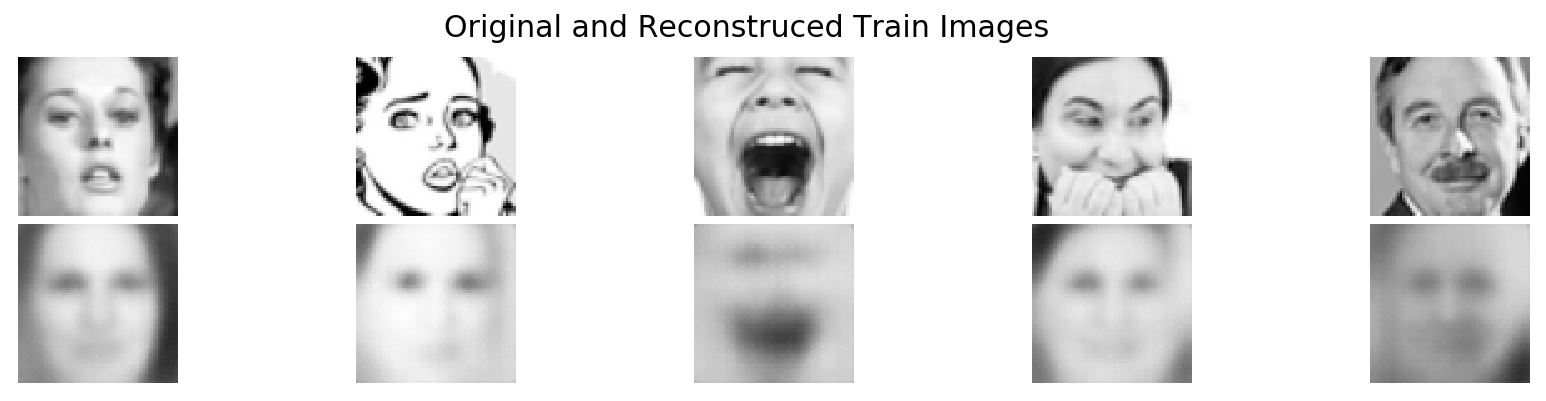

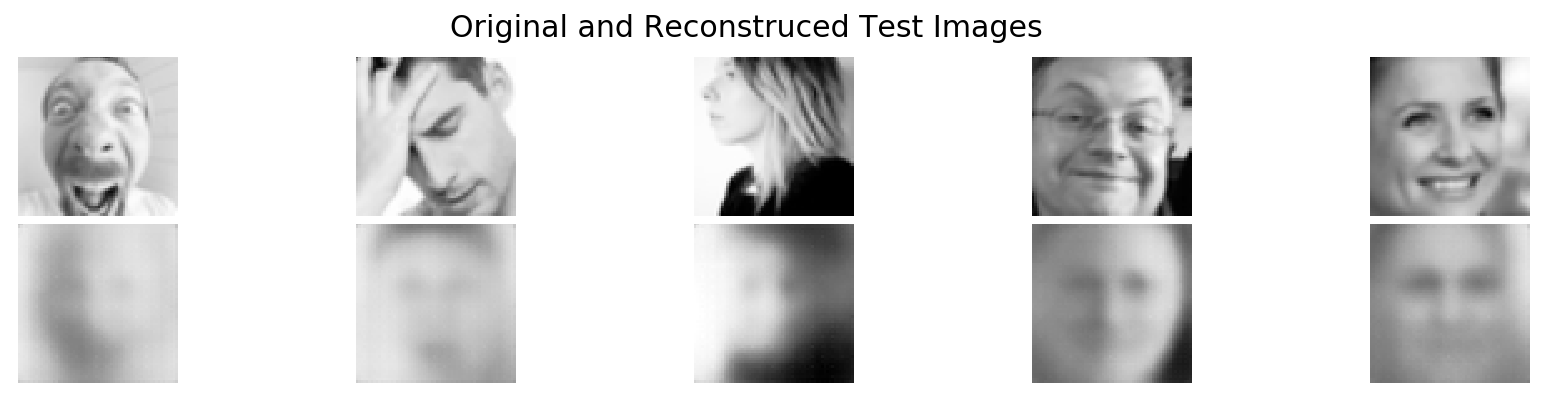

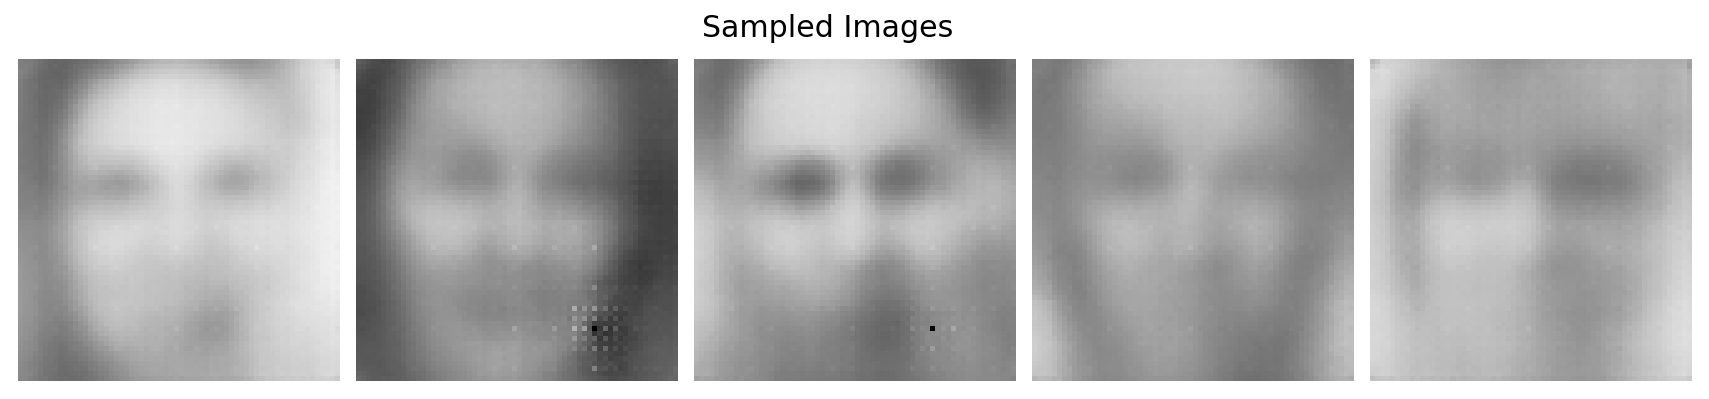

[2e+03/1e+04 22.0%][kl_weight:1.00] [LOSS] TOTAL[275.3]=RECON[230.0]+KL[45.2]
[2e+03/1e+04 24.0%][kl_weight:1.00] [LOSS] TOTAL[288.5]=RECON[232.1]+KL[56.4]
[3e+03/1e+04 26.0%][kl_weight:1.00] [LOSS] TOTAL[306.1]=RECON[239.0]+KL[67.1]
[3e+03/1e+04 28.0%][kl_weight:1.00] [LOSS] TOTAL[277.4]=RECON[222.6]+KL[54.8]
[3e+03/1e+04 30.0%][kl_weight:1.00] [LOSS] TOTAL[284.8]=RECON[229.7]+KL[55.0]


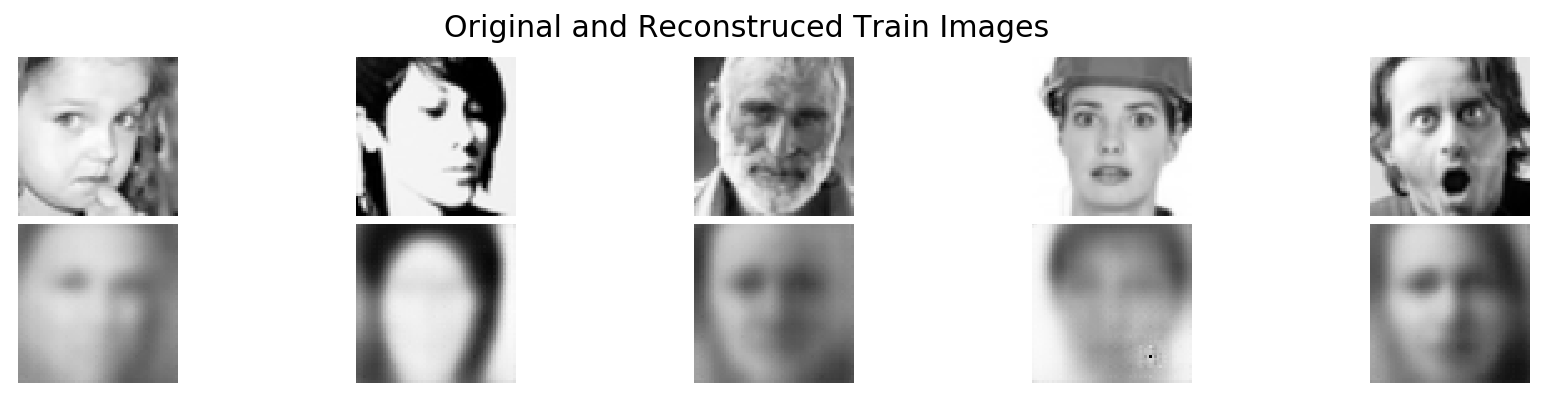

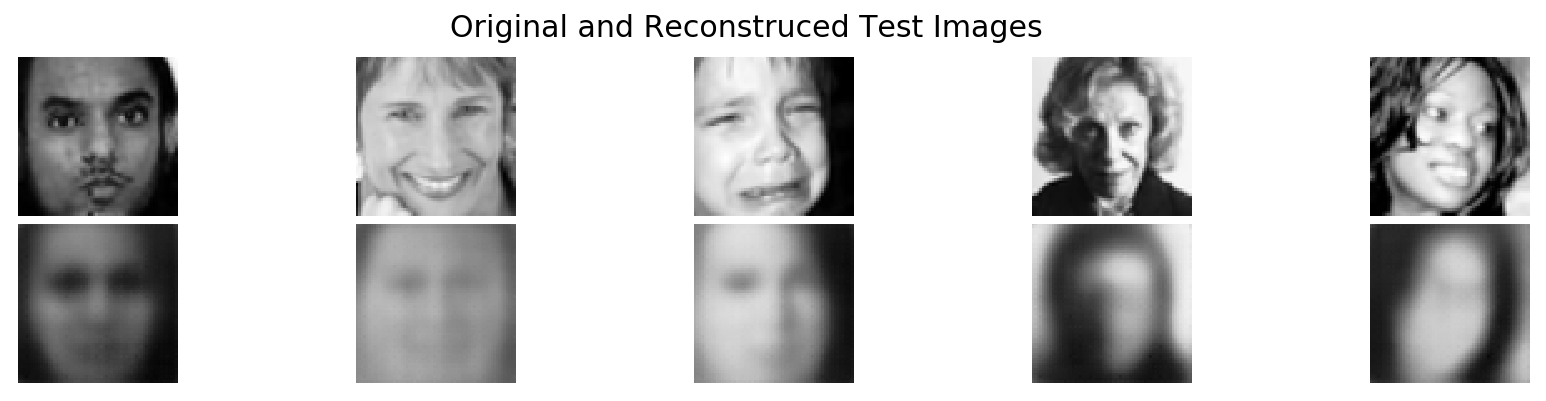

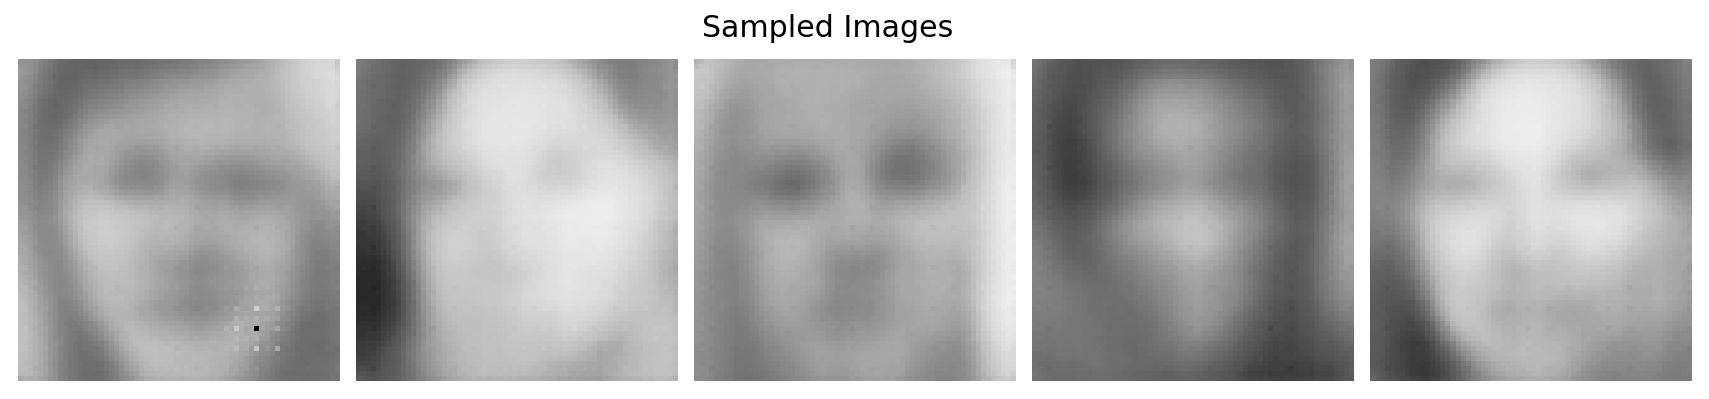

[3e+03/1e+04 32.0%][kl_weight:1.00] [LOSS] TOTAL[277.9]=RECON[212.3]+KL[65.6]
[3e+03/1e+04 34.0%][kl_weight:1.00] [LOSS] TOTAL[421.3]=RECON[237.6]+KL[183.7]
[4e+03/1e+04 36.0%][kl_weight:1.00] [LOSS] TOTAL[257.5]=RECON[210.5]+KL[47.1]
[4e+03/1e+04 38.0%][kl_weight:1.00] [LOSS] TOTAL[275.6]=RECON[220.8]+KL[54.8]
[4e+03/1e+04 40.0%][kl_weight:1.00] [LOSS] TOTAL[271.3]=RECON[221.7]+KL[49.5]


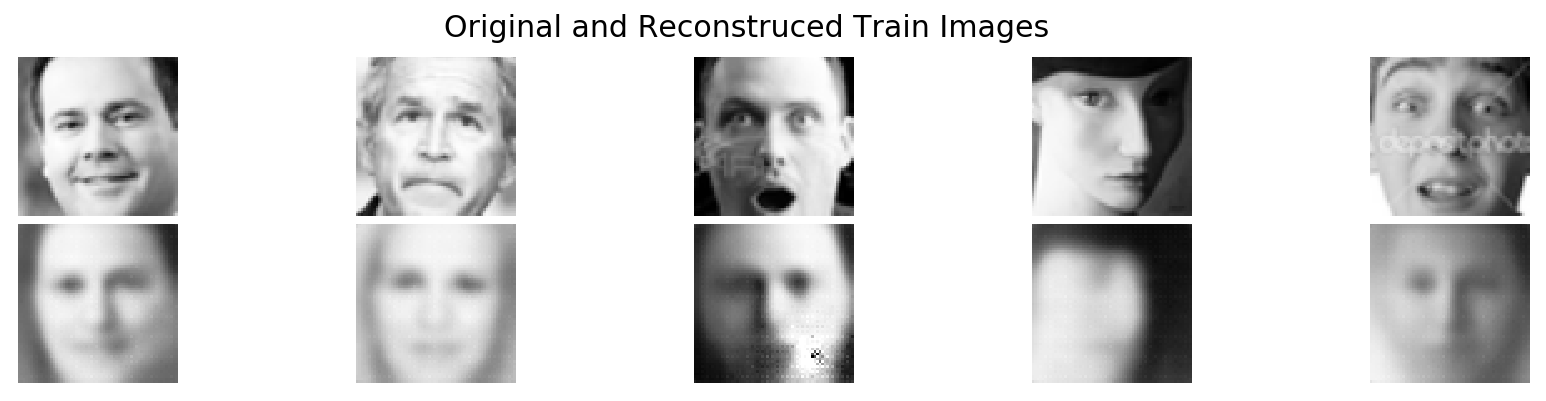

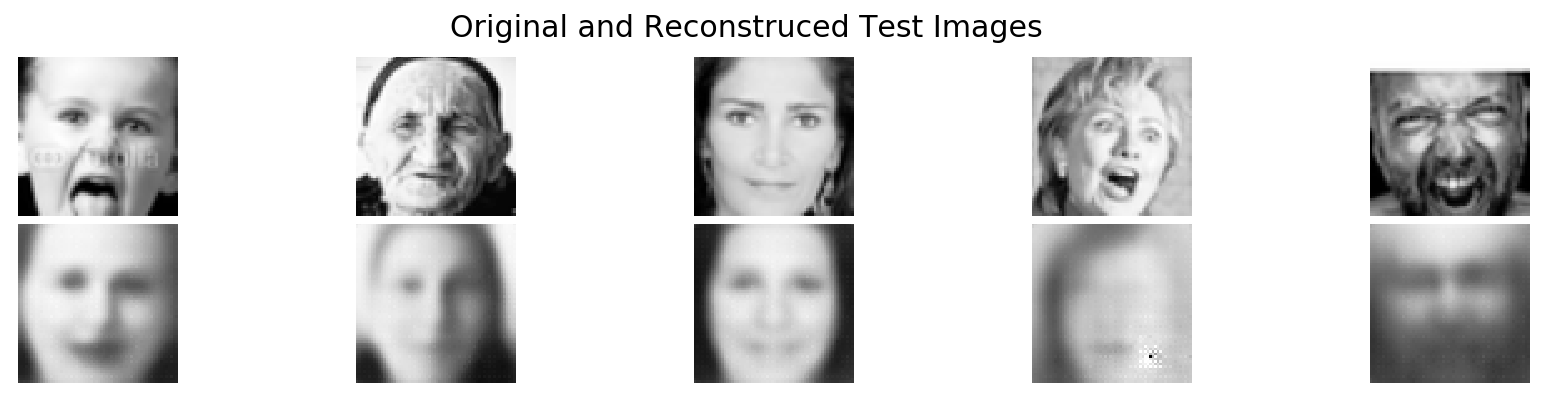

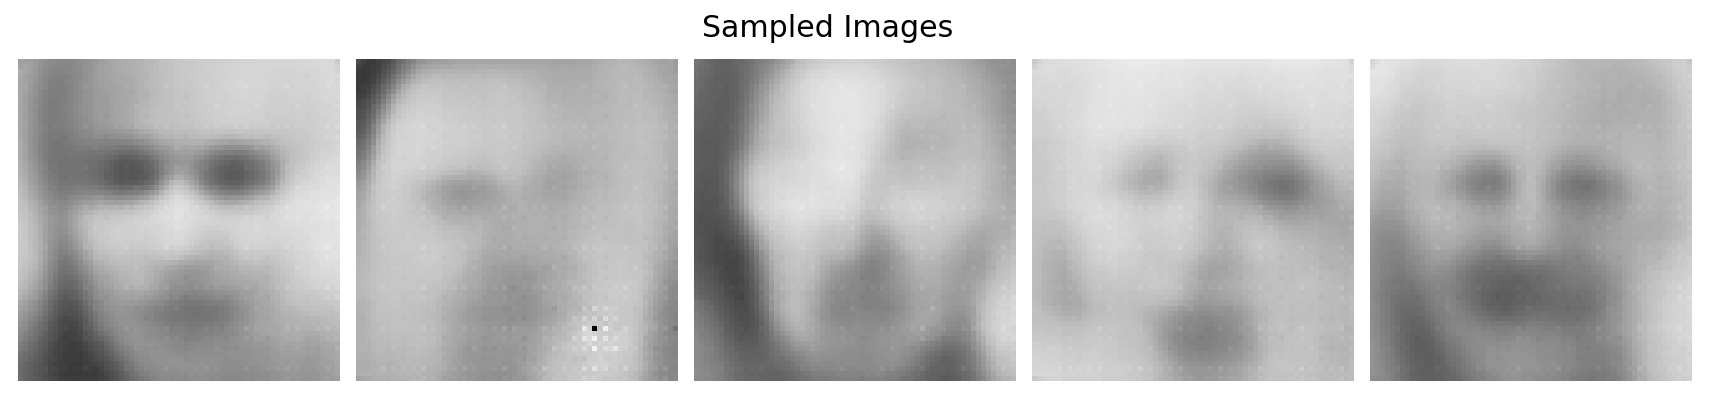

[4e+03/1e+04 42.0%][kl_weight:1.00] [LOSS] TOTAL[254.0]=RECON[209.3]+KL[44.7]
[4e+03/1e+04 44.0%][kl_weight:1.00] [LOSS] TOTAL[327.8]=RECON[221.3]+KL[106.6]
[5e+03/1e+04 46.0%][kl_weight:1.00] [LOSS] TOTAL[265.7]=RECON[213.6]+KL[52.1]
[5e+03/1e+04 48.0%][kl_weight:1.00] [LOSS] TOTAL[280.3]=RECON[217.6]+KL[62.6]
[5e+03/1e+04 50.0%][kl_weight:1.00] [LOSS] TOTAL[253.4]=RECON[209.7]+KL[43.7]


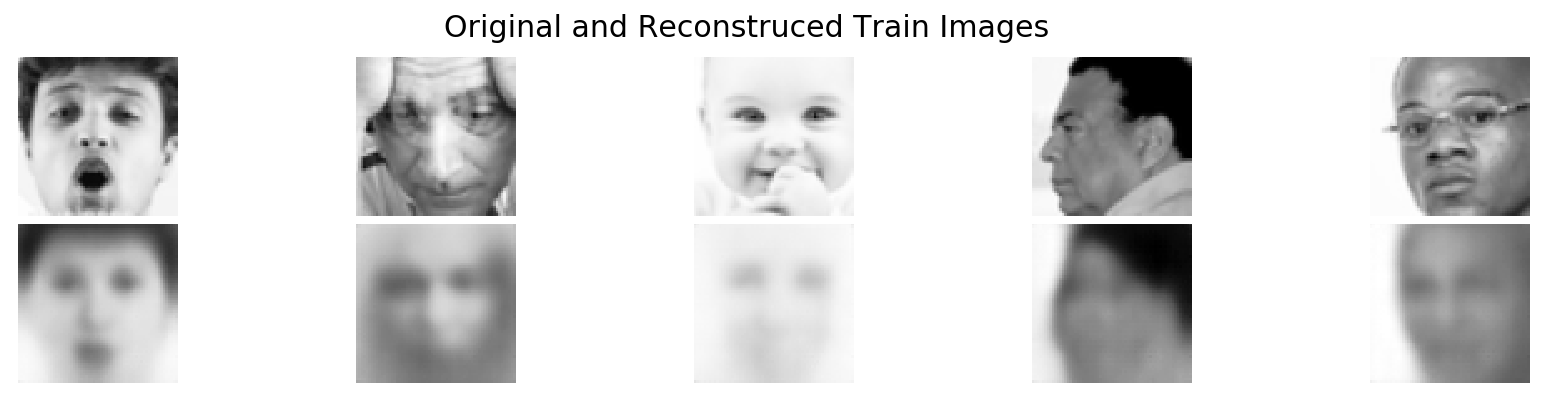

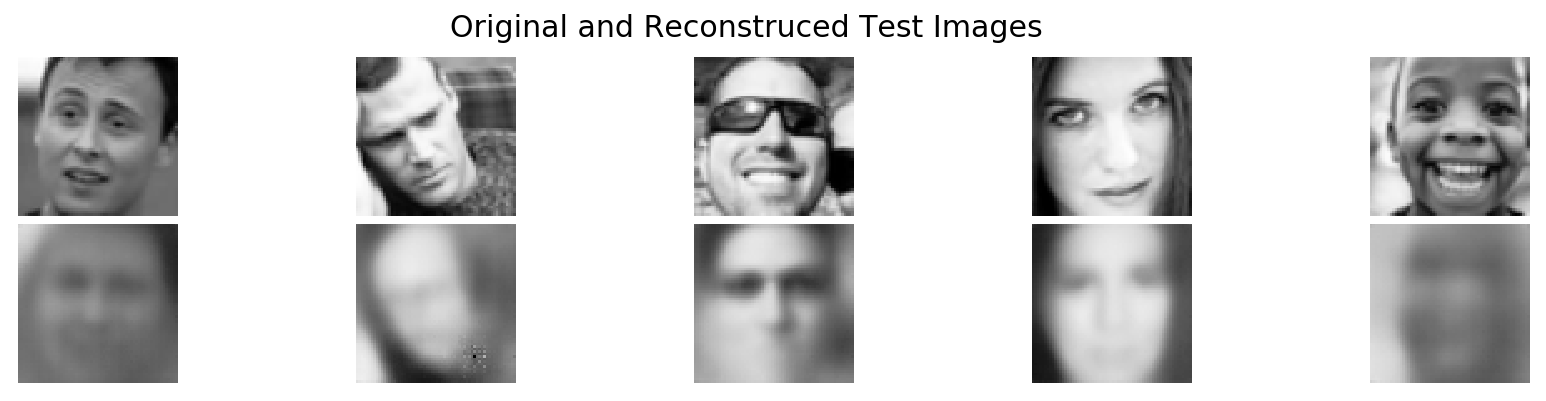

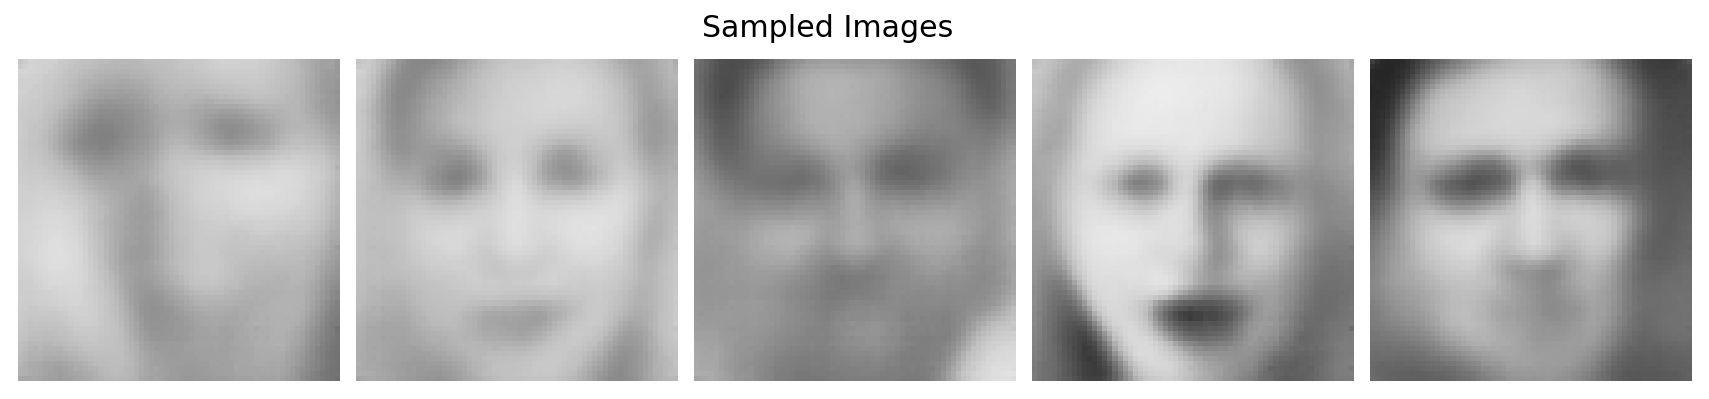

[5e+03/1e+04 52.0%][kl_weight:1.00] [LOSS] TOTAL[262.1]=RECON[217.5]+KL[44.6]
[5e+03/1e+04 54.0%][kl_weight:1.00] [LOSS] TOTAL[244.6]=RECON[198.3]+KL[46.4]
[6e+03/1e+04 56.0%][kl_weight:1.00] [LOSS] TOTAL[253.4]=RECON[212.5]+KL[40.9]
[6e+03/1e+04 58.0%][kl_weight:1.00] [LOSS] TOTAL[246.9]=RECON[202.7]+KL[44.2]
[6e+03/1e+04 60.0%][kl_weight:1.00] [LOSS] TOTAL[250.1]=RECON[198.8]+KL[51.3]


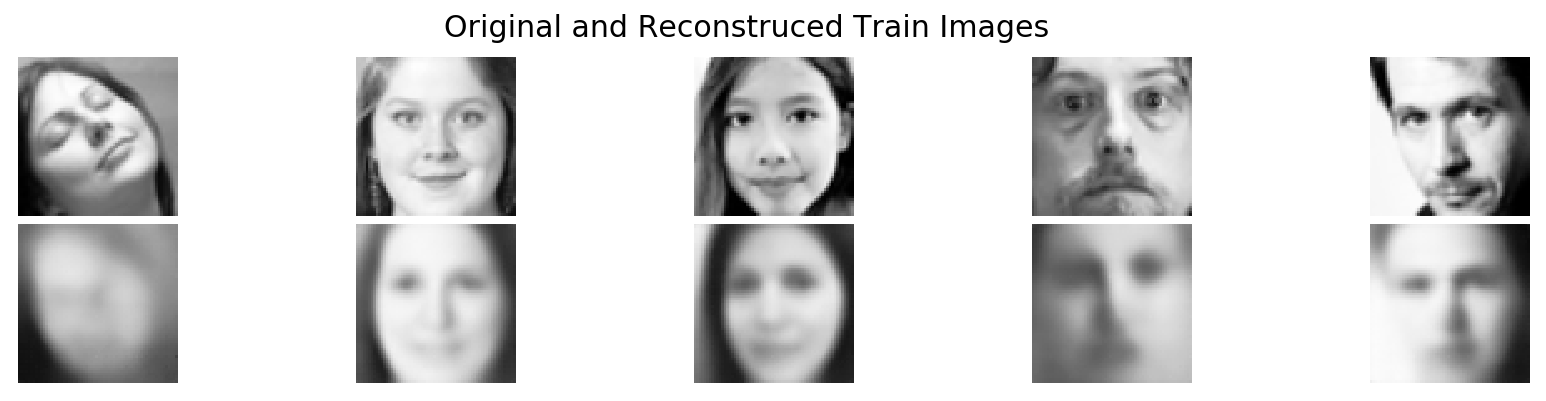

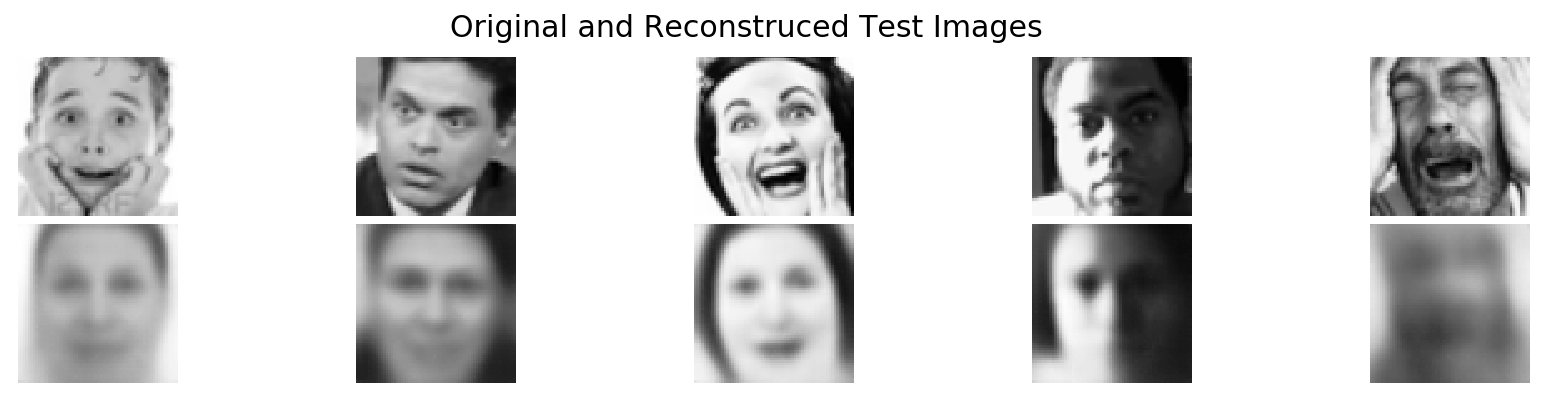

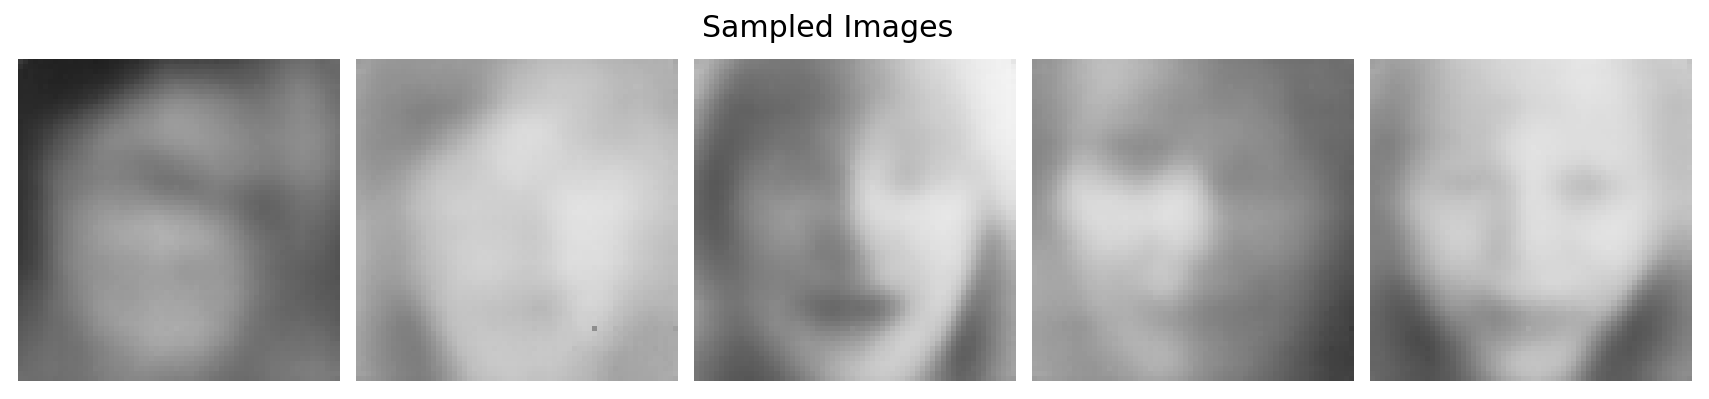

[6e+03/1e+04 62.0%][kl_weight:1.00] [LOSS] TOTAL[248.5]=RECON[202.1]+KL[46.4]
[6e+03/1e+04 64.0%][kl_weight:1.00] [LOSS] TOTAL[259.0]=RECON[216.1]+KL[42.9]
[7e+03/1e+04 66.0%][kl_weight:1.00] [LOSS] TOTAL[263.5]=RECON[203.1]+KL[60.3]
[7e+03/1e+04 68.0%][kl_weight:1.00] [LOSS] TOTAL[298.5]=RECON[210.2]+KL[88.3]
[7e+03/1e+04 70.0%][kl_weight:1.00] [LOSS] TOTAL[258.3]=RECON[209.6]+KL[48.7]


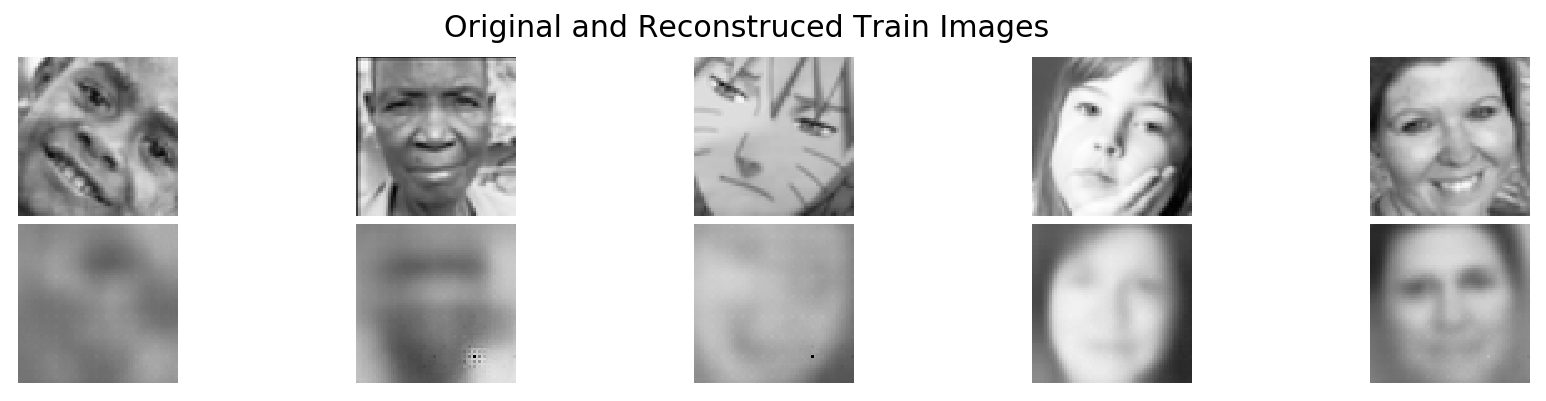

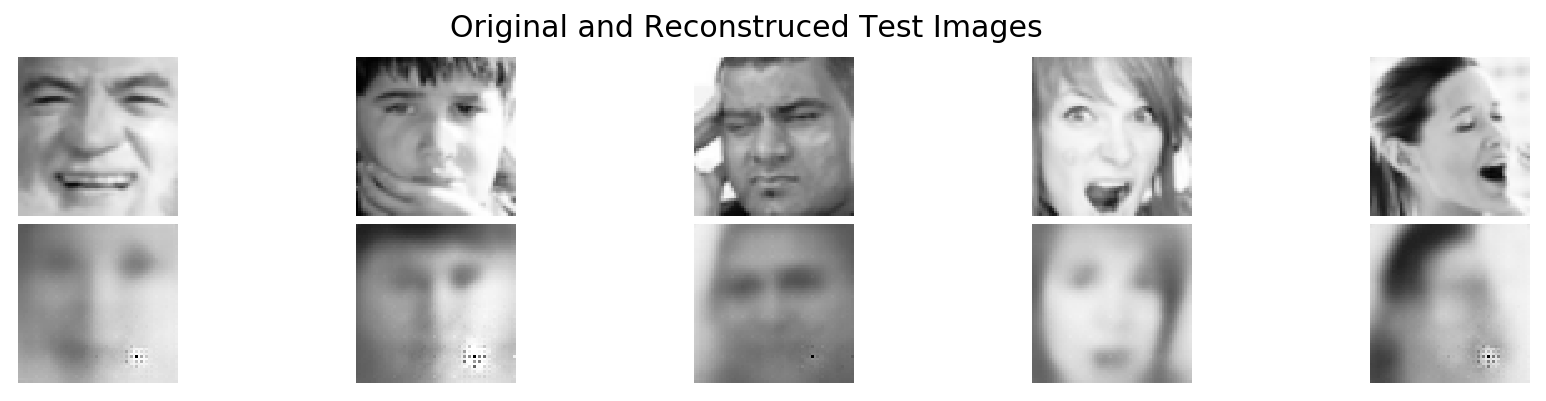

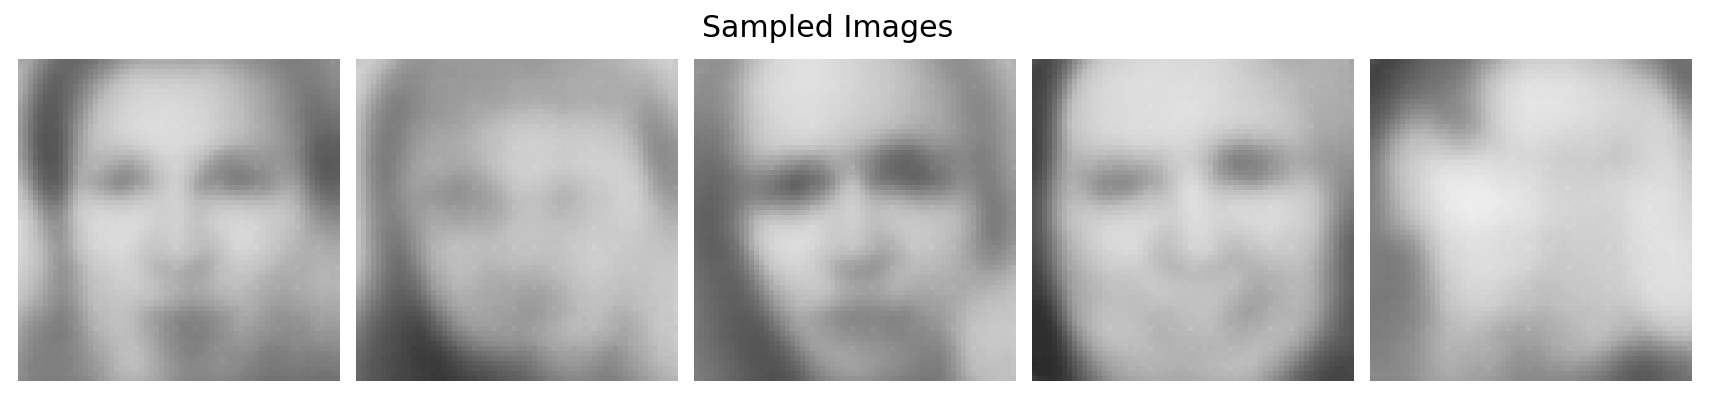

[7e+03/1e+04 72.0%][kl_weight:1.00] [LOSS] TOTAL[255.5]=RECON[207.5]+KL[48.0]
[7e+03/1e+04 74.0%][kl_weight:1.00] [LOSS] TOTAL[256.6]=RECON[204.4]+KL[52.2]
[8e+03/1e+04 76.0%][kl_weight:1.00] [LOSS] TOTAL[255.0]=RECON[201.3]+KL[53.7]
[8e+03/1e+04 78.0%][kl_weight:1.00] [LOSS] TOTAL[245.9]=RECON[200.0]+KL[46.0]
[8e+03/1e+04 80.0%][kl_weight:1.00] [LOSS] TOTAL[237.7]=RECON[197.1]+KL[40.6]


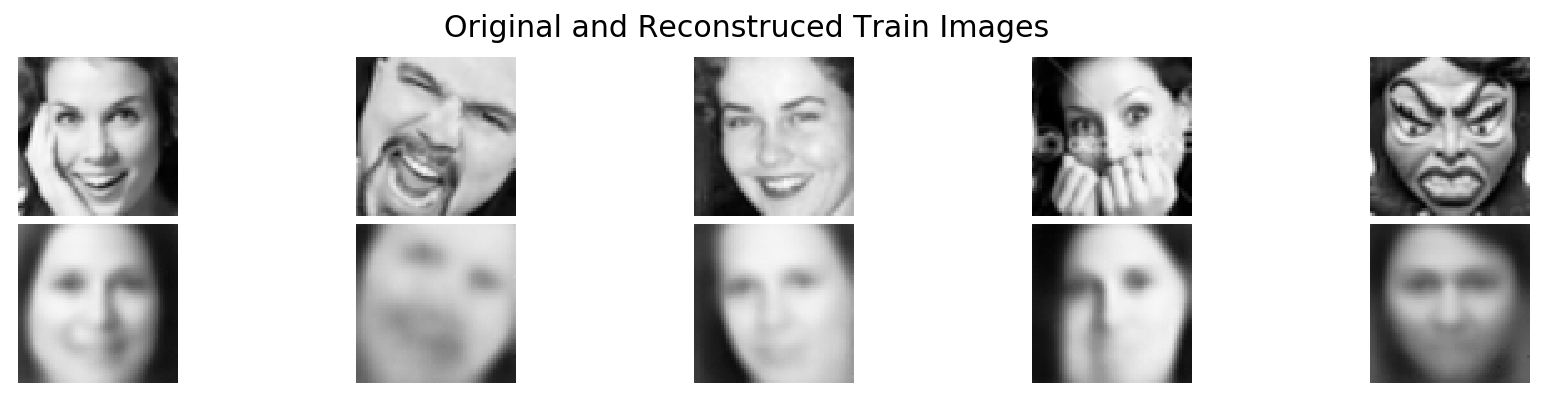

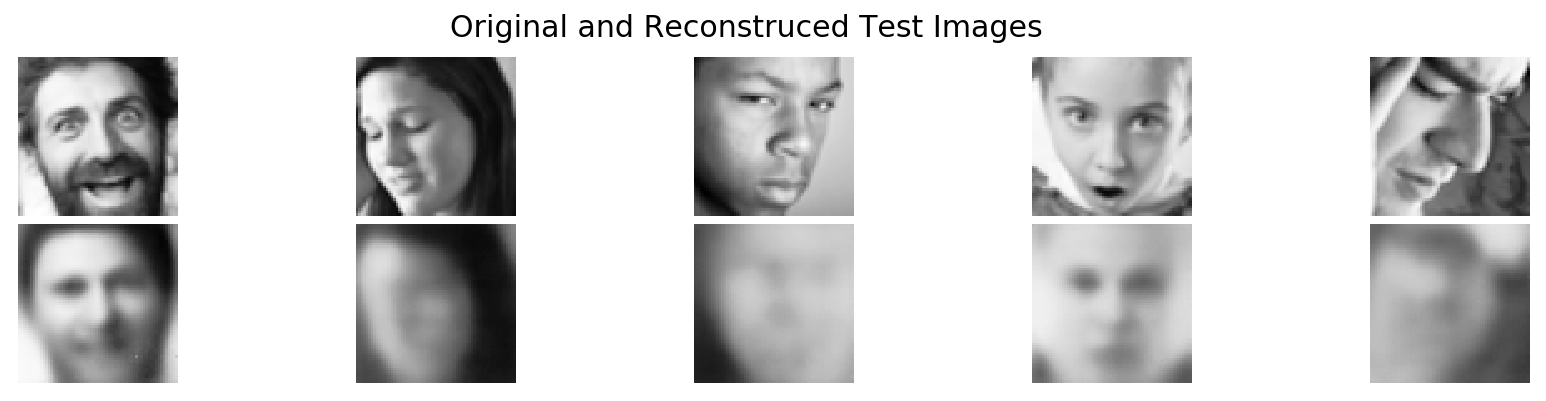

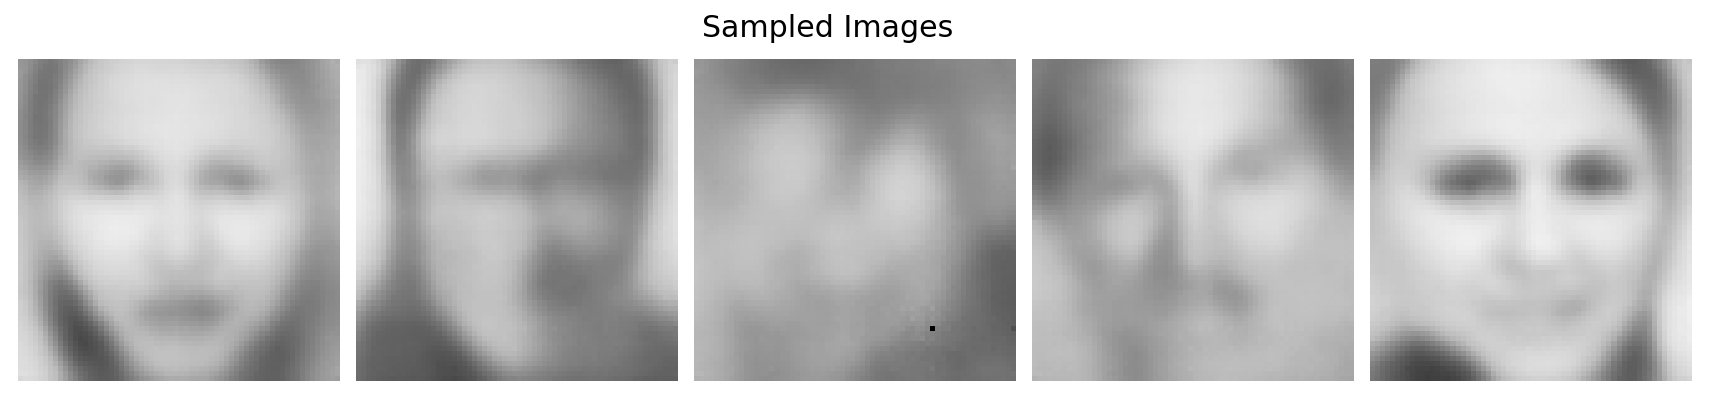

[8e+03/1e+04 82.0%][kl_weight:1.00] [LOSS] TOTAL[251.8]=RECON[200.4]+KL[51.5]
[8e+03/1e+04 84.0%][kl_weight:1.00] [LOSS] TOTAL[241.6]=RECON[197.5]+KL[44.1]
[9e+03/1e+04 86.0%][kl_weight:1.00] [LOSS] TOTAL[246.0]=RECON[192.7]+KL[53.3]
[9e+03/1e+04 88.0%][kl_weight:1.00] [LOSS] TOTAL[245.3]=RECON[198.0]+KL[47.3]
[9e+03/1e+04 90.0%][kl_weight:1.00] [LOSS] TOTAL[242.3]=RECON[195.6]+KL[46.8]


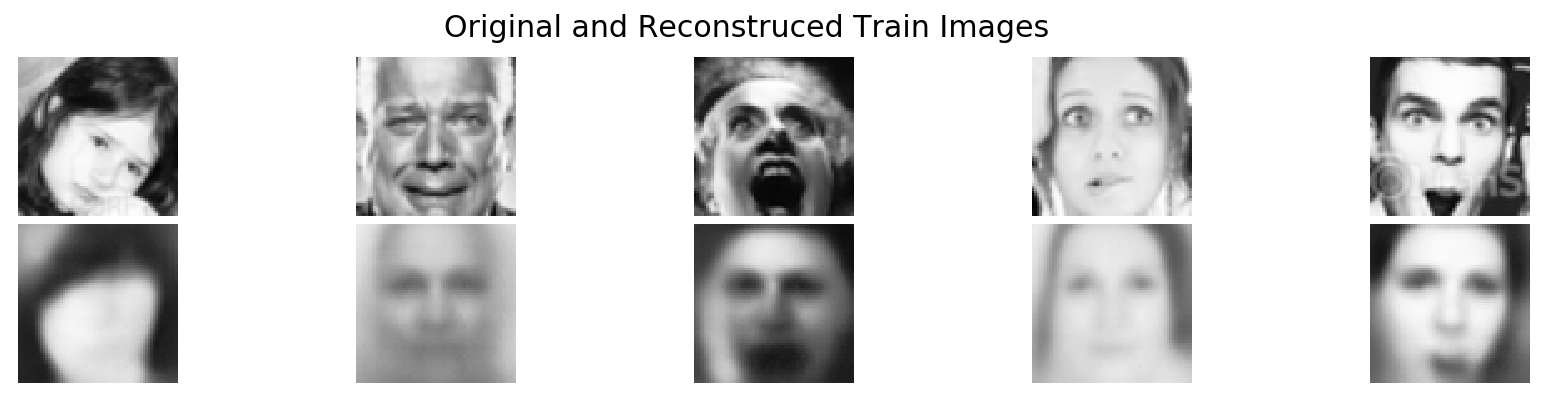

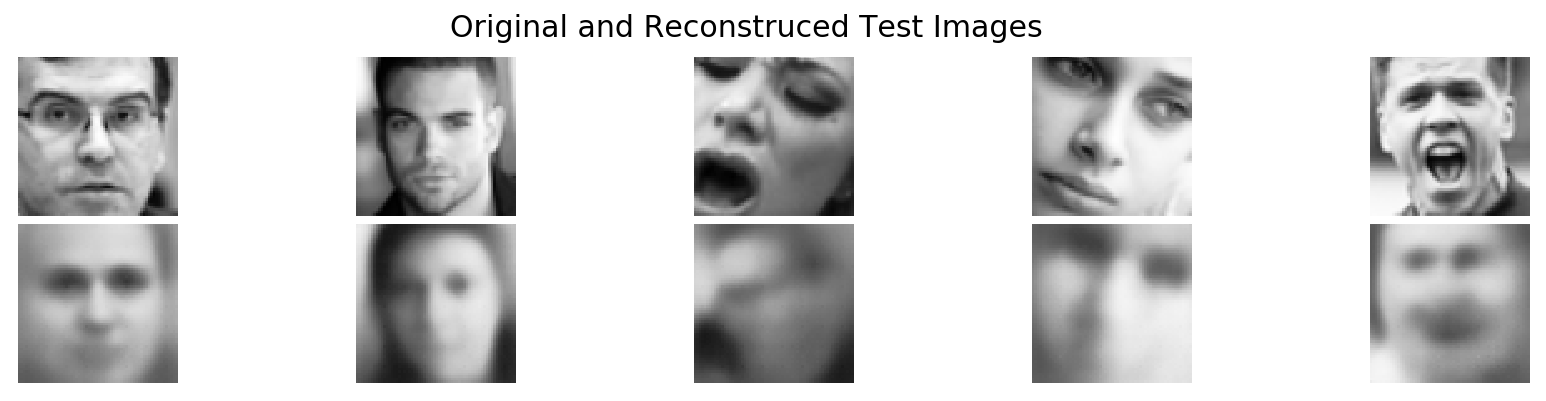

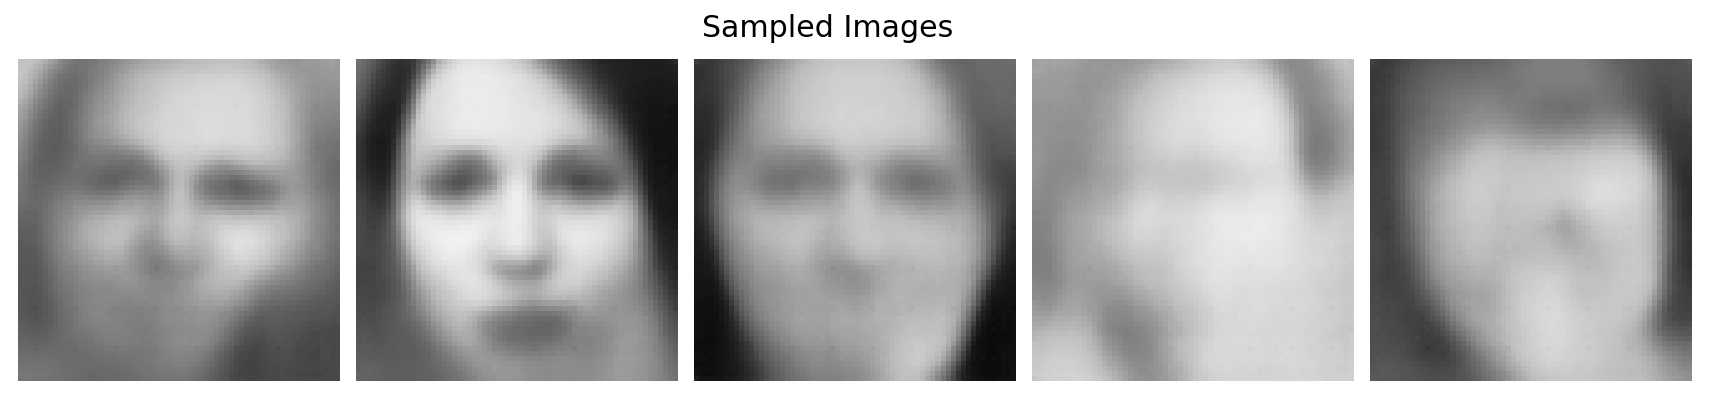

[9e+03/1e+04 92.0%][kl_weight:1.00] [LOSS] TOTAL[460.7]=RECON[419.9]+KL[40.8]
[9e+03/1e+04 94.0%][kl_weight:1.00] [LOSS] TOTAL[268.8]=RECON[200.2]+KL[68.6]
[1e+04/1e+04 96.0%][kl_weight:1.00] [LOSS] TOTAL[265.2]=RECON[209.5]+KL[55.7]
[1e+04/1e+04 98.0%][kl_weight:1.00] [LOSS] TOTAL[254.4]=RECON[201.7]+KL[52.7]
Done


In [4]:
sess = gpusession()
sess.run(tf.global_variables_initializer())
MAXITER,BATCHSIZE = (int)(1e4),128
PRINTEVERY,PLOTEVERY = (int)(MAXITER/50),(int)(MAXITER/10)
for ITER in range(MAXITER):
    RATE      = (float)(ITER)/(float)(MAXITER)
    offset    = (ITER*BATCHSIZE)%(ntrain) 
    batch_x   = trainimg[offset:(offset+BATCHSIZE),:]
    kl_weight = 1
    feeds = {V.x:batch_x,V.is_training:True,V.kl_weight:kl_weight}
    tfops = [V.solver,V.total_loss,V.recon_loss,V.kl_loss]
    _,total_loss,recon_loss,kl_loss=sess.run(tfops,feed_dict=feeds)
    if ITER % PRINTEVERY == 0:
        print ("[%.0e/%.0e %.1f%%][kl_weight:%.2f] [LOSS] TOTAL[%.1f]=RECON[%.1f]+KL[%.1f]"%
               (ITER,MAXITER,RATE*100.,kl_weight,total_loss,recon_loss,kl_loss))
    if ITER % PLOTEVERY == 0:
        """ Plot reconstructed train images """
        xref    = trainimg[np.random.permutation(ntrain)[:5],:]
        xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
        xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                                  xrecon),axis=0)
        plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
                       _figsize=(15,3),_title='Original and Reconstruced Train Images')
        """ Plot reconstructed test images """
        xref    = testimg[np.random.permutation(ntest)[:5],:]
        xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
        xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                                  xrecon),axis=0)
        plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
                       _figsize=(15,3),_title='Original and Reconstruced Test Images')
        """ Plot sampled images """
        samples = sess.run(V.xrecon_sample, 
                           feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
        plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
                       _title='Sampled Images')
print ("Done")

Save

In [5]:
V.save(_sess=sess,_savename='net/net_dcvae.npz')

[net/net_dcvae.npz] Saved. Size is [162.9]MB


Initialize 

Network initialized


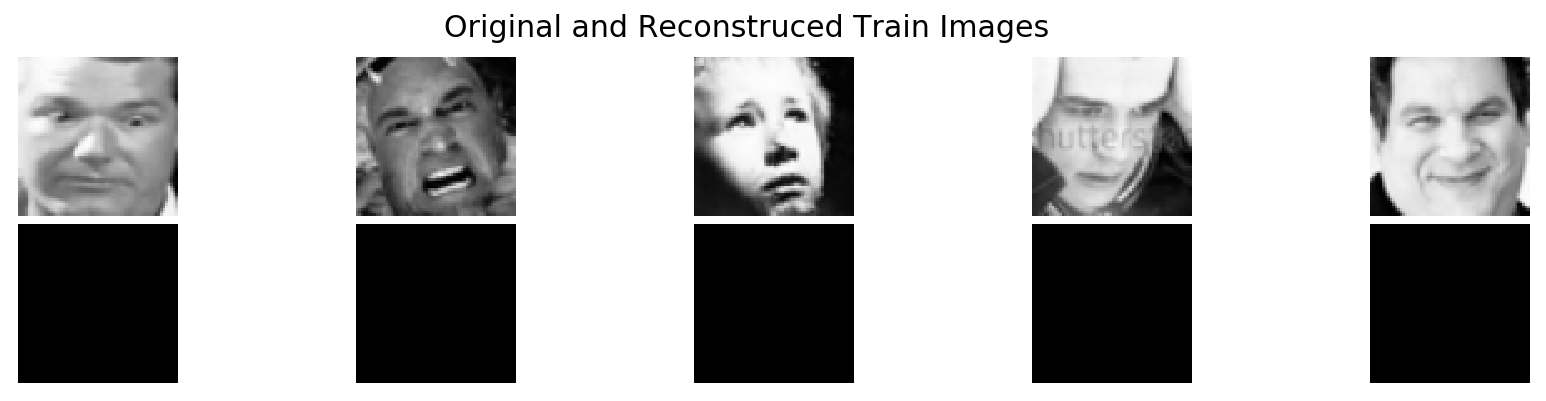

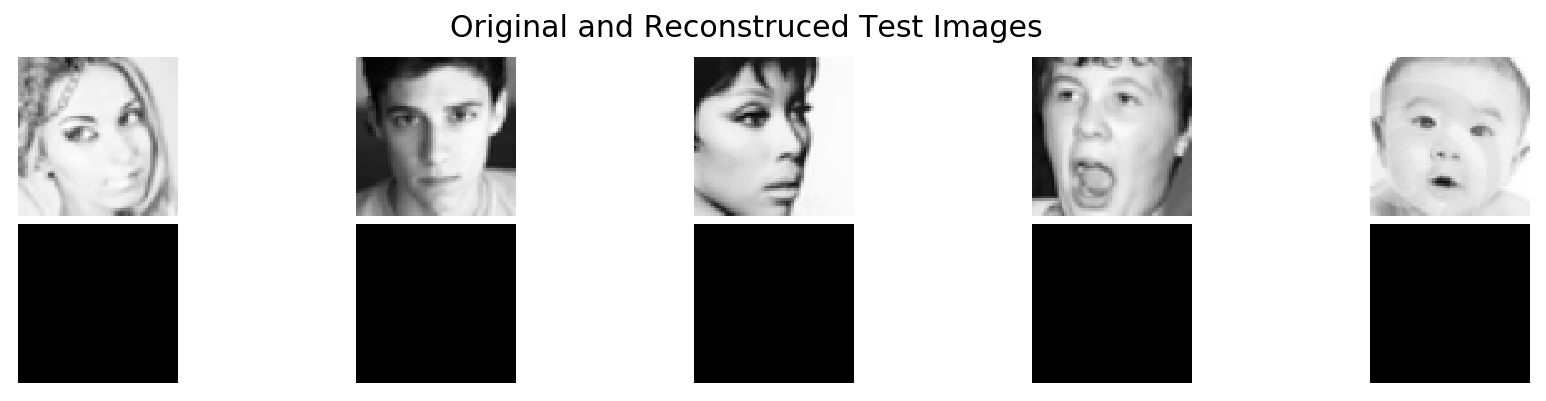

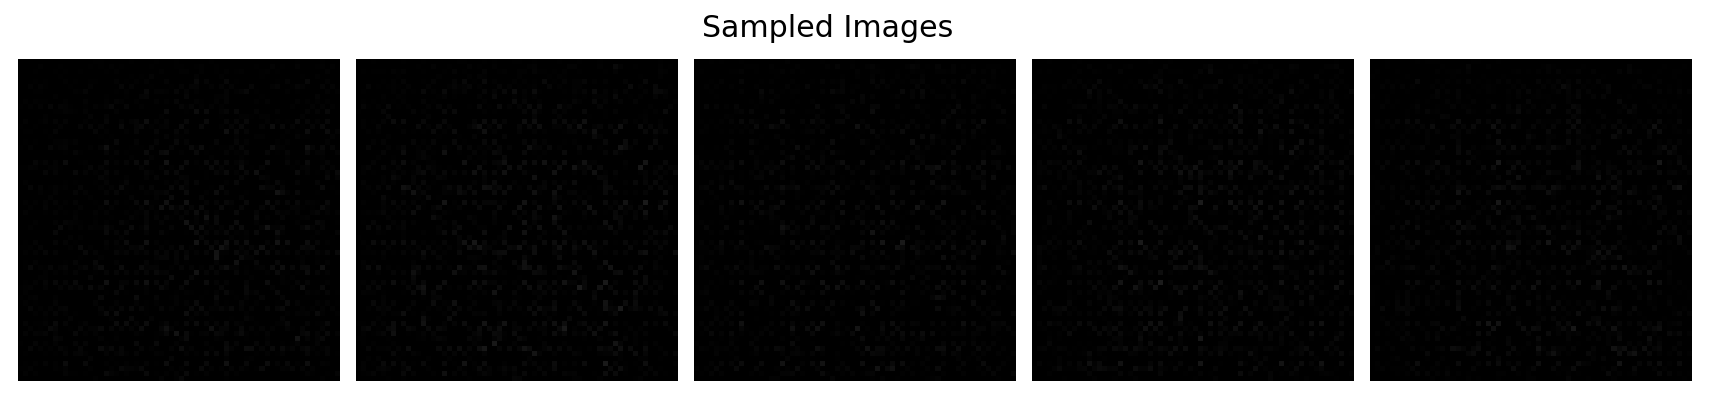

In [6]:
sess.run(tf.global_variables_initializer())
print ("Network initialized")

""" Plot reconstructed train images """
xref    = trainimg[np.random.permutation(ntrain)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                          xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Train Images')
""" Plot reconstructed test images """
xref    = testimg[np.random.permutation(ntest)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                          xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Test Images')
""" Plot sampled images """
samples = sess.run(V.xrecon_sample, 
                   feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
               _title='Sampled Images')

Restore

Weight restored from [net/net_dcvae.npz]
Network restored


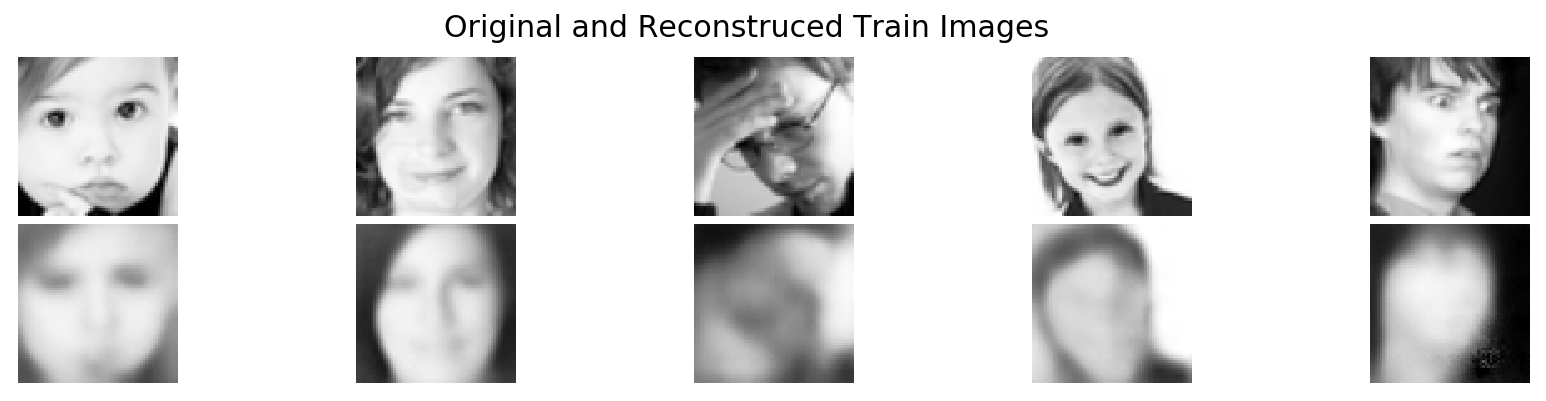

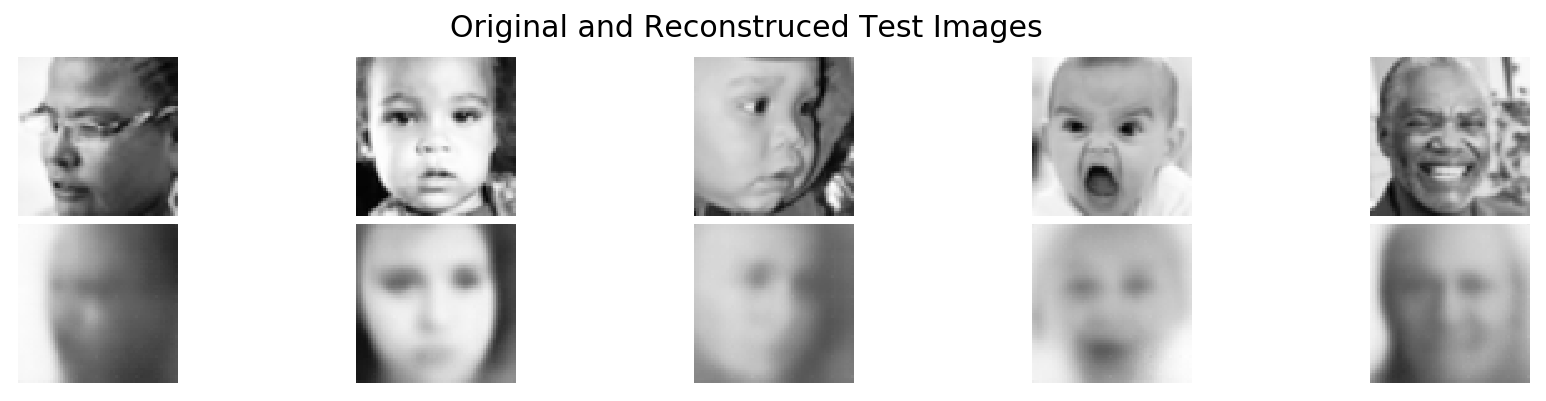

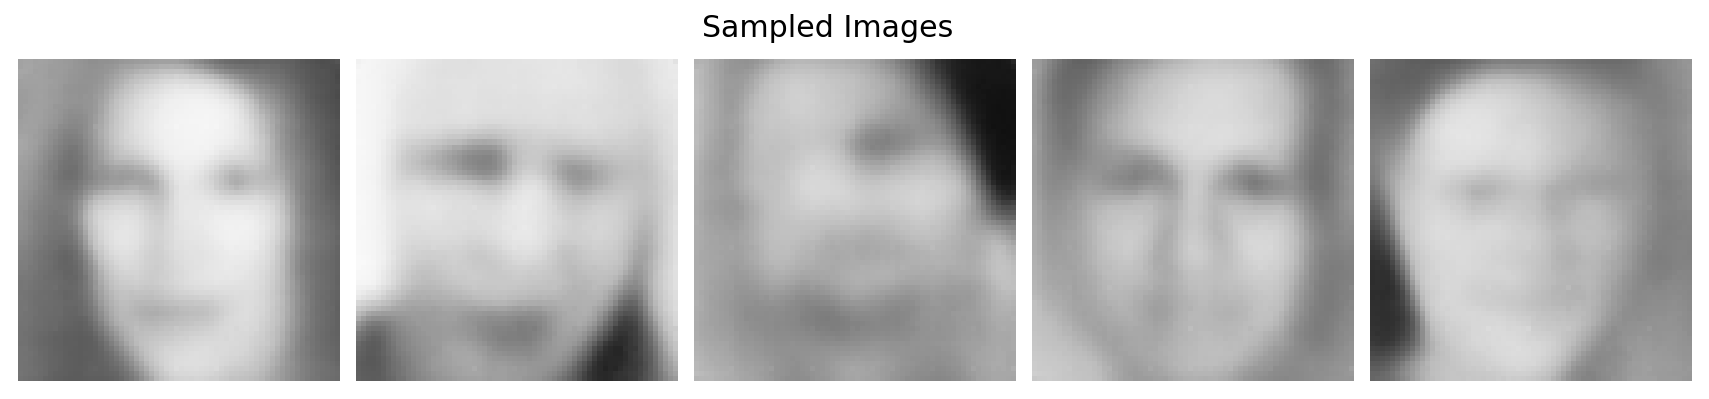

In [7]:
V.restore(_sess=sess,_loadname='net/net_dcvae.npz')
print ("Network restored")

""" Plot reconstructed train images """
xref    = trainimg[np.random.permutation(ntrain)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                          xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Train Images')
""" Plot reconstructed test images """
xref    = testimg[np.random.permutation(ntest)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((np.reshape(xref,(-1,V.xdim[0],V.xdim[1],V.xdim[2])),
                          xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Test Images')
""" Plot sampled images """
samples = sess.run(V.xrecon_sample, 
                   feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
               _title='Sampled Images')